## import local

if no test dataset:
    train,test    =split
 = Balance(train)

clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)

bagging n boost = True

sklearn.calibration.
clf_cal = CalibratedClassifierCV(cv_clf,cv=prefit, cv = k)   resulting in k**2

2 modes for kaggle
1. train,train-valid, train-test using split-train_test
    ratio = .2 verify model against train dataset
2. train,train-valid, test using split-train_test 
   create model from bigger trainset, using ratio = 0.2.0,1 etce
use clf_cal. predict on test


In [1]:
from __future__ import print_function
__file__ = !cd .. ;pwd
__file__ = __file__[0]
__file__

'/Users/brucecottman/Documents/PROJECTS/paso'

In [2]:
import sys
from random import random
import pandas as pd

sys.path.append(__file__)
sys.path

['/Users/brucecottman/Documents/PROJECTS/paso/lessons',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/paso']

In [3]:
from paso.base import Paso,Log,PasoError,Param,NameToClass
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.3.yaml').startup()

paso 26.7.2019 17:52:39 INFO Log started
paso 26.7.2019 17:52:39 INFO ========================================
paso 26.7.2019 17:52:39 INFO Read in parameter file: ../parameters/lesson.3.yaml


## Balancing and  Augmentating Class Stratified Data

Structured Data Augmentation is very rarely discussed in theoretical or real-world production systems. It a secret sauce for which the recipe will be shown here. Along the way, we will introduce ``paso's`` Class Balancing tools. As was shown in the previous two articles, **paso** supports and is compatiable with ``sklearn``.



## A Quick Overview of paso

**paso** is a package written in Python and some ``C``(for speed) that was originally intended to bundle best-practices and state-of-the-art services, classes and functions for the Machine Learning and Deep Learning community. **paso** has grown beyond this to offer patterns, classes and methods you can use in your **Scikit-Learn pipelines** or custom code with or without adopting the entire **paso** package.

**Scikit-Learn pipelines** are composed of steps, each step has to be **Scikit-Learn transformer** or a custom **Scikit-Learn transformer**. The last of the pipeline can be a transformer or an estimator, where a **Scikit-Learn estimator** is a compatible model. 

**paso** has quite a few Class Balancing transformers that are custom **Scikit-Learn transformers**. Note that **paso** translates from Spanish to English to the word step.

Discussion will be divided into the following major segments:
- Loading a Toy Dataset with **paso** inputter.
- What Class Balancing stratagems are in **paso**.
- How to use Class Balancing to argument Fixed Structure data
- The benefits of argumenting Fixed Structure data.
- As usual the source code for all examples is available.

As we saw in [lesson-1](), we need to startup **paso** services.

In [4]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary

import warnings
warnings.filterwarnings("ignore")
import multiprocessing

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import seaborn as sns
color = sns.color_palette()

from paso.base import Paso,Log,PasoError
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.3.yaml').startup()

paso 26.7.2019 17:52:39 INFO ========================================
paso 26.7.2019 17:52:39 INFO Read in parameter file: ../parameters/lesson.3.yaml


## Toy Example Dataset

The **paso** class is a general method to read in datasets and return them as dataframes. For now, we can use them. In a future lesson we will cover  ``Inputer`` in  detail.  All available ``Inputer`` methods are shown with:

In [5]:
from paso.pre.inputers import Inputer,Splitter
inputer = Inputer()
inputer.inputers()

['exec', 'cvs', 'xls', 'xlsm', 'text', 'image2D', 'image3D']

Let us start with a toy dataset to class balance. we load the ``iris``data set, into the ``Flower``dataframe.  The feature ``TypeOf`` will contain the class target values.

Instead of using keyword arguments cemented in code, I will use an ontological file. One working definition of ontological is:

    "showing the relations between the concepts and categories in a subject area or domain".

We are using ontological files because:
- the description of an object (dataset, model,etc.) can be changed without changing code
- the parsing performance of an ontological file and python are about the same as both use dynamic typing. This probably would not be case for statically typed language. However, an object's description parsing compute is very tiny compared to the action(s) performed on or by the object in all cases encountered so far.

Ontological files consist of hierarchy of key-value pairs.  In a future lesson we will cover Ontological files in  detail. [Different Ontological files can be viewed here.](https://github.com/bcottman/paso/tree/master/ontologies)


In [6]:
Flower = inputer.transform(ontological_filepath='../ontologies/pre/inputers/iris.yaml')
inputer.target

paso 26.7.2019 17:52:39 INFO Loaded Ontological file:../ontologies/pre/inputers/iris.yaml 


'TypeOf'

In [7]:
DataFrameSummary(Flower).summary()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TypeOf
count,150,150,150,150,150
mean,5.84333,3.05733,3.758,1.19933,1
std,0.828066,0.435866,1.7653,0.762238,0.819232
min,4.3,2,1,0.1,0
25%,5.1,2.8,1.6,0.3,0
50%,5.8,3,4.35,1.3,1
75%,6.4,3.3,5.1,1.8,2
max,7.9,4.4,6.9,2.5,2
counts,150,150,150,150,150
uniques,35,23,43,22,3


## It is important to split first before balancing

Before training the learner it is very important to balance only the dataset we will train on. We want to know the effect of balancing data on the learner, while not corrupting our validation  dataset with balancing data. 

Validation is drawn from the initial train dataset in the hopes it is a sample of the past and future data that the test dataset will be drawn from. The other case where train, valid, test are covered by splitting the initial dataset to result in train and valid. Then split on train to get train and test. The order does not matter so long as the second split is on train.

In [8]:
splitter = Splitter()
train,test=splitter.transform(Flower,target=inputer.target,ontological_filepath='../ontologies/pre/inputers/split-stratify-shuffle-20.yaml')

paso 26.7.2019 17:52:40 INFO Loaded Ontological file:../ontologies/pre/inputers/split-stratify-shuffle-20.yaml 


Note: A ``valid`` dataset is not made as we are not tuning learner parameters in this lesson. 

## paso Class for Handling Imbalanced Classes

All available class balance strategies are shown with:

In [9]:
from paso.pre.cleaners import Class_Balance
o = Class_Balance('SMOTE')
o.classBalancers()

paso 26.7.2019 17:52:40 INFO Class_Balance:: SMOTE


['RanZOverSample',
 'SMOTE',
 'ADASYN:',
 'BorderLineSMOTE',
 'SVMSMOTE',
 'SMOTENC',
 'RandomUnderSample',
 'ClusterCentroids',
 'NearMiss',
 'EditedNearestNeighbour',
 'RepeatedEditedNearestNeighbours',
 'CondensedNearestNeighbour',
 'OneSidedSelection']

I am going to oversample the minority classes by using ``SMOOT``. I reccomend [Handling imbalanced datasets in machine learning](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)

In [10]:
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
train = Class_Balance(Class_BalancerKey).transform(train,targetFeature)

paso 26.7.2019 17:52:40 INFO Class_Balance:: SMOTE


In [11]:
DataFrameSummary(train).summary()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),TypeOf
count,105,105,105,105,105
mean,3.7581,1.20952,5.85619,3.08476,1
std,1.74883,0.767178,0.783229,0.447381,0.820413
min,1.1,0.1,4.3,2.2,0
25%,1.5,0.3,5.2,2.8,0
50%,4.5,1.3,5.8,3,1
75%,5.1,1.8,6.4,3.4,2
max,6.7,2.5,7.9,4.4,2
counts,105,105,105,105,105
uniques,40,20,32,21,3


``Class_Balance`` did not change the ``Flower-train`` dataframe as the ``iris``dataset comes class balanced. 

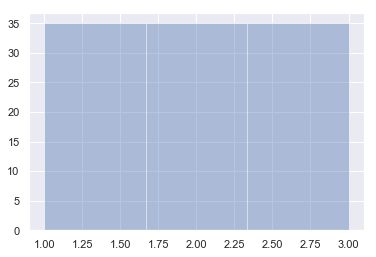

In [12]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot((train['TypeOf'].astype('category').cat.codes.astype('int')+1),kde=False)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [14]:
from paso.learners.learners import Learner
o = Learner()
o.train(train,ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')


paso 26.7.2019 17:52:40 INFO Loaded Ontological file:../ontologies/learners/RandomForestClassification.yaml 
paso 26.7.2019 17:52:40 INFO RandomForest target: TypeOf
paso 26.7.2019 17:52:40 INFO learner: RandomForest with kwargs {'n_estimators': 100, 'n_jobs': -1, 'criterion': 'gini'}
paso 26.7.2019 17:52:40 INFO cross_validation: BaggingClassifier
paso 26.7.2019 17:52:40 INFO     cv kwargs: {'n_estimators': 100, 'bootstrap_features': True, 'max_samples': 0.9, 'max_features': 1.0}
paso 26.7.2019 17:52:58 INFO cross_validation: CalibratedClassifierCV
paso 26.7.2019 17:52:58 INFO     cv kwargs: {'method': 'isotonic', 'cv': 10}


CalibratedClassifierCV(base_estimator=BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_sample...timators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
            cv=10, method='isotonic')

The argument ratio is the amount of the dataset to assign to the validation (test) dataset. In this case,
``X``and ``y`` datasets into training set(80\%) and validation set(20\%). Train and predict using ``RanadomForestClassifier``.

Because the population of each of the Iris classes is about the same, the accuracy and the F1-score are almost equal.

paso 26.7.2019 18:00:49 INFO Confusion matrix, without normalization
paso 26.7.2019 18:00:49 INFO Normalized confusion matrix


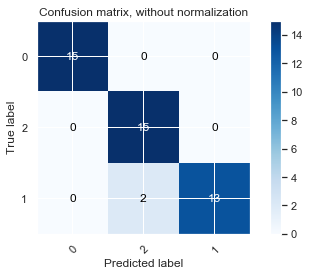

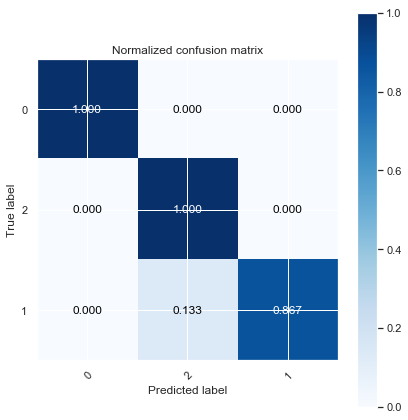

paso 26.7.2019 18:00:49 INFO measures of error evaluated for model: RandomForest


{'confusion_matrix': array([[15,  0,  0],
        [ 0, 15,  0],
        [ 0,  2, 13]]),
 'logLoss': 4.245887166578904,
 'accuracy': 0.9555555555555556,
 'precision': 0.9607843137254902,
 'recall': 0.9555555555555556,
 'f1': 0.9553571428571429,
 'AOC': 0}

In [15]:
o.predict(test,measure=True)
o.metrics

Overall, very good scores using ``RandomForestClassifier``. 

## Augment the ``iris``dataset.

Now we can augment (increase by 10\% the amount data) with  synthetic data generated by a claas imbalence scheme,  ``SMOOT``. Just ``TypeOf=0`` needs 15(10%) rows (3 classes of 5 rows) of synthetic data to balance the classes. The result is similar to image augmention in that we accomplished structured data augmentation by increasing the row count ``Isis``dataset with synthetic data.

In [16]:
from paso.pre.cleaners import Augment_by_Class
ratio = 0.1
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(Flower,targetFeature,0.1)
DataFrameSummary(X).summary()

paso 26.7.2019 18:00:49 INFO Augment_by_Class: SMOTE
paso 26.7.2019 18:00:49 INFO Class_Balance:: SMOTE
paso 26.7.2019 18:00:49 INFO Class_Balance:: SMOTE
paso 26.7.2019 18:00:49 INFO Class_Balance:: SMOTE


,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),TypeOf
count,165,165,165,165,165
mean,3.75238,1.1995,5.82805,3.05782,1
std,1.75399,0.758626,0.818354,0.428608,0.818982
min,1,0.1,4.3,2,0
25%,1.6,0.3,5.1,2.8,0
50%,4.3,1.3,5.8,3,1
75%,5.1,1.8,6.4,3.30919,2
max,6.9,2.5,7.9,4.4,2
counts,165,165,165,165,165
uniques,54,32,43,36,3


Notice the ``mean``, ``std`` and other statistics have slightly changed. Also, the count has inreased by 10% or augmented a structured dataset by 10%. Why do expect slight and not large change in the dataset statistics?

### A small aside on cross-validation and classification train/predict model

In an future lesson, I will cover in detail how to use **paso**'s cross-validation and models that can train and then predict. In the meantime, you can find a good [overview of cross-validation](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and a [detailed discussion of cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics).

In this lesson, we use **repeated random sub-sampling** This is hopefully a good choice for the class stratified datasets we will be using.
Similar to K-Fold, we set a value for K which signifies the number of times we will train our model. However, in this case K will not represent the number of equally sized partitions.
Instead, on each training iteration, we randomly select points to be for the testing set. The number of points we select will be a certain percentage we set for the testing set. For example, if we select 15%, then on each training iteration we will randomly select 15% of the points in our dataset to be set aside for training.

## Using the RandomForest model

paso 26.7.2019 18:00:49 INFO Loaded Ontological file:../ontologies/learners/RandomForestClassification.yaml 
paso 26.7.2019 18:00:49 INFO RandomForest target: TypeOf
paso 26.7.2019 18:00:49 INFO learner: RandomForest with kwargs {'n_estimators': 100, 'n_jobs': -1, 'criterion': 'gini'}
paso 26.7.2019 18:00:50 INFO cross_validation: BaggingClassifier
paso 26.7.2019 18:00:50 INFO     cv kwargs: {'n_estimators': 100, 'bootstrap_features': True, 'max_samples': 0.9, 'max_features': 1.0}
paso 26.7.2019 18:01:04 INFO cross_validation: CalibratedClassifierCV
paso 26.7.2019 18:01:04 INFO     cv kwargs: {'method': 'isotonic', 'cv': 10}
paso 26.7.2019 18:09:03 INFO Confusion matrix, without normalization
paso 26.7.2019 18:09:03 INFO Normalized confusion matrix


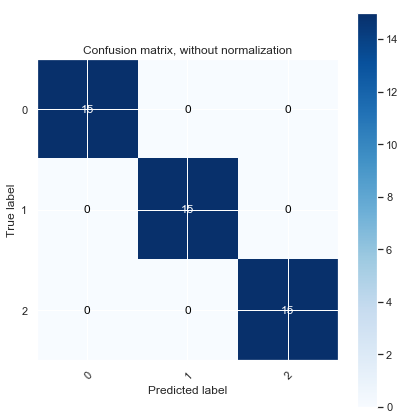

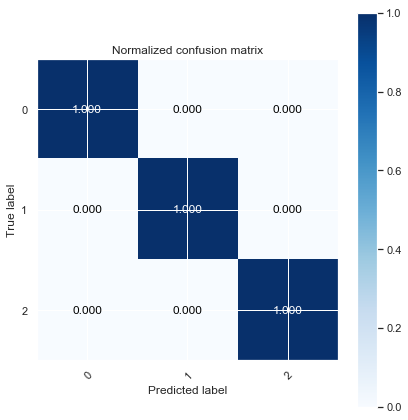

paso 26.7.2019 18:09:04 INFO measures of error evaluated for model: RandomForest


{'confusion_matrix': array([[15,  0,  0],
        [ 0, 15,  0],
        [ 0,  0, 15]]),
 'logLoss': 1.4105396561516106,
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'AOC': 0}

In [17]:
o = Learner()
o.train(X,ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')
o.predict(test,measure=True)
o.metrics

Hmmm, seemed to improve scores dramatically.. Let us try 100% augmentation or double the number of rows in the  ``Flower`` dataframe.

In [18]:
ratio = 1.00
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(Flower,targetFeature,ratio)
DataFrameSummary(X).summary()

paso 26.7.2019 18:09:04 INFO Augment_by_Class: SMOTE
paso 26.7.2019 18:09:04 INFO Class_Balance:: SMOTE
paso 26.7.2019 18:09:04 INFO Class_Balance:: SMOTE
paso 26.7.2019 18:09:04 INFO Class_Balance:: SMOTE


,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),TypeOf
count,300,300,300,300,300
mean,3.75485,1.19724,5.84628,3.06215,1
std,1.73836,0.754257,0.812183,0.412362,0.817861
min,1,0.1,4.3,2,0
25%,1.56287,0.3,5.1064,2.8,0
50%,4.36504,1.34307,5.8,3,1
75%,5.1,1.8,6.40816,3.3,2
max,6.9,2.5,7.9,4.4,2
counts,300,300,300,300,300
uniques,168,126,163,142,3


paso 26.7.2019 18:09:04 INFO Loaded Ontological file:../ontologies/learners/RandomForestClassification.yaml 
paso 26.7.2019 18:09:04 INFO RandomForest target: TypeOf
paso 26.7.2019 18:09:04 INFO learner: RandomForest with kwargs {'n_estimators': 100, 'n_jobs': -1, 'criterion': 'gini'}
paso 26.7.2019 18:09:04 INFO cross_validation: BaggingClassifier
paso 26.7.2019 18:09:04 INFO     cv kwargs: {'n_estimators': 100, 'bootstrap_features': True, 'max_samples': 0.9, 'max_features': 1.0}
paso 26.7.2019 18:09:19 INFO cross_validation: CalibratedClassifierCV
paso 26.7.2019 18:09:19 INFO     cv kwargs: {'method': 'isotonic', 'cv': 10}
paso 26.7.2019 18:17:10 INFO Confusion matrix, without normalization
paso 26.7.2019 18:17:10 INFO Normalized confusion matrix


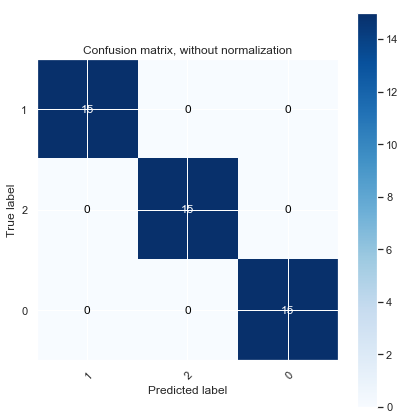

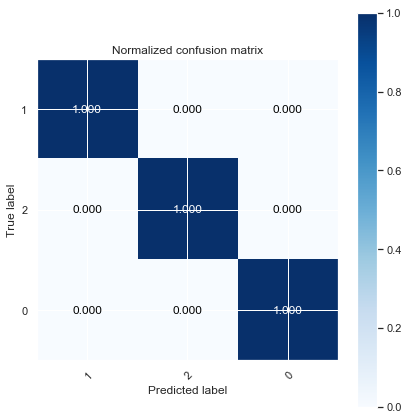

paso 26.7.2019 18:17:10 INFO measures of error evaluated for model: RandomForest


{'confusion_matrix': array([[15,  0,  0],
        [ 0, 15,  0],
        [ 0,  0, 15]]),
 'logLoss': 1.1050290265069687,
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'AOC': 0}

In [19]:
o = Learner()
o.train(X,ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')
o.predict(test,measure=True)
o.metrics

It seems to be more accurate in predicting the holdout (test) dataset.

Seemed to raise the accuracy by 0.024. Not bad, in both the real-world and the **Kaggle** world this is huge!

In [20]:
ratio = 1.00
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(X,targetFeature,ratio)
DataFrameSummary(X).summary()

paso 26.7.2019 18:17:11 INFO Augment_by_Class: SMOTE
paso 26.7.2019 18:17:11 INFO Class_Balance:: SMOTE
paso 26.7.2019 18:17:11 INFO Class_Balance:: SMOTE
paso 26.7.2019 18:17:11 INFO Class_Balance:: SMOTE


,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),TypeOf
count,600,600,600,600,600
mean,3.74639,1.19717,5.84151,3.07392,1
std,1.73113,0.750018,0.800598,0.412273,0.817178
min,1,0.1,4.3,2,0
25%,1.55898,0.3,5.1773,2.8,0
50%,4.33951,1.33778,5.8,3.00546,1
75%,5.1,1.80047,6.44473,3.3,2
max,6.9,2.5,7.9,4.4,2
counts,600,600,600,600,600
uniques,445,362,435,404,3


paso 26.7.2019 18:17:11 INFO Loaded Ontological file:../ontologies/learners/RandomForestClassification.yaml 
paso 26.7.2019 18:17:11 INFO RandomForest target: TypeOf
paso 26.7.2019 18:17:11 INFO learner: RandomForest with kwargs {'n_estimators': 100, 'n_jobs': -1, 'criterion': 'gini'}
paso 26.7.2019 18:17:11 INFO cross_validation: BaggingClassifier
paso 26.7.2019 18:17:11 INFO     cv kwargs: {'n_estimators': 100, 'bootstrap_features': True, 'max_samples': 0.9, 'max_features': 1.0}
paso 26.7.2019 18:17:26 INFO cross_validation: CalibratedClassifierCV
paso 26.7.2019 18:17:26 INFO     cv kwargs: {'method': 'isotonic', 'cv': 10}
paso 26.7.2019 18:25:18 INFO Confusion matrix, without normalization
paso 26.7.2019 18:25:18 INFO Normalized confusion matrix


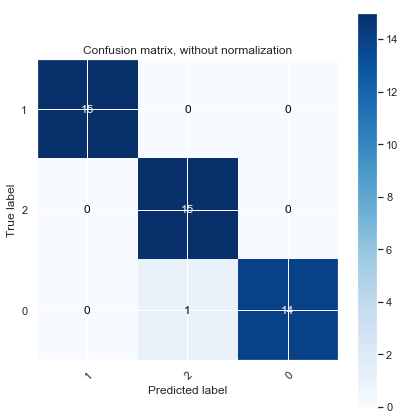

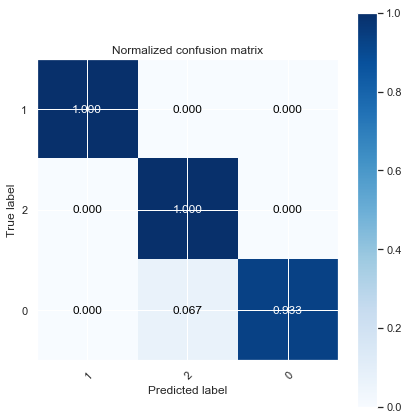

paso 26.7.2019 18:25:19 INFO measures of error evaluated for model: RandomForest


{'confusion_matrix': array([[15,  0,  0],
        [ 0, 15,  0],
        [ 0,  1, 14]]),
 'logLoss': 1.572729838490832,
 'accuracy': 0.9777777777777777,
 'precision': 0.9791666666666666,
 'recall': 0.9777777777777779,
 'f1': 0.9777530589543938,
 'AOC': 0}

In [21]:
o = Learner()
o.train(X,ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')
o.predict(test,measure=True)
o.metrics

Seemed to raise the accuracy by 0.014 or .039 by quadrupling.

In [22]:
ratio = 1.00
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(X,targetFeature,ratio)
DataFrameSummary(X).summary()

paso 26.7.2019 18:25:19 INFO Augment_by_Class: SMOTE
paso 26.7.2019 18:25:19 INFO Class_Balance:: SMOTE
paso 26.7.2019 18:25:19 INFO Class_Balance:: SMOTE
paso 26.7.2019 18:25:19 INFO Class_Balance:: SMOTE


,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),TypeOf
count,1200,1200,1200,1200,1200
mean,3.74549,1.1981,5.8415,3.07634,1
std,1.73007,0.748103,0.79356,0.409606,0.816837
min,1,0.1,4.3,2,0
25%,1.50439,0.3,5.19405,2.79879,0
50%,4.38787,1.34521,5.80863,3.02036,1
75%,5.09374,1.8,6.4449,3.3,2
max,6.9,2.5,7.9,4.4,2
counts,1200,1200,1200,1200,1200
uniques,1005,835,983,949,3


paso 26.7.2019 18:25:19 INFO Loaded Ontological file:../ontologies/learners/RandomForestClassification.yaml 
paso 26.7.2019 18:25:19 INFO RandomForest target: TypeOf
paso 26.7.2019 18:25:19 INFO learner: RandomForest with kwargs {'n_estimators': 100, 'n_jobs': -1, 'criterion': 'gini'}
paso 26.7.2019 18:25:19 INFO cross_validation: BaggingClassifier
paso 26.7.2019 18:25:19 INFO     cv kwargs: {'n_estimators': 100, 'bootstrap_features': True, 'max_samples': 0.9, 'max_features': 1.0}
paso 26.7.2019 18:25:36 INFO cross_validation: CalibratedClassifierCV
paso 26.7.2019 18:25:36 INFO     cv kwargs: {'method': 'isotonic', 'cv': 10}
paso 26.7.2019 18:33:42 INFO Confusion matrix, without normalization
paso 26.7.2019 18:33:42 INFO Normalized confusion matrix


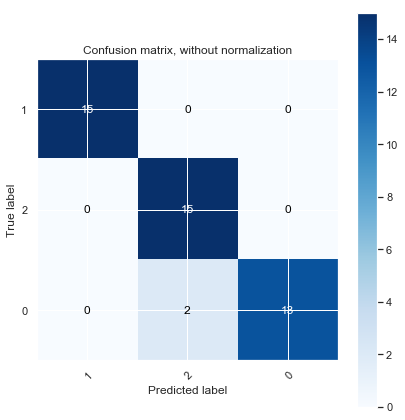

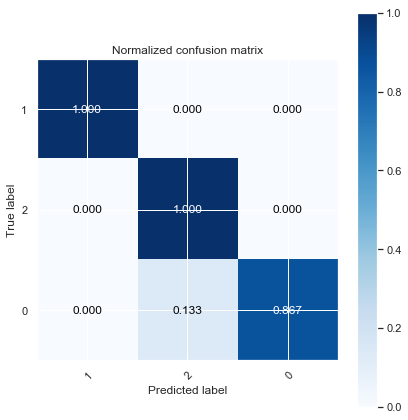

paso 26.7.2019 18:33:42 INFO measures of error evaluated for model: RandomForest


{'confusion_matrix': array([[15,  0,  0],
        [ 0, 15,  0],
        [ 0,  2, 13]]),
 'logLoss': 1.538921252612363,
 'accuracy': 0.9555555555555556,
 'precision': 0.9607843137254902,
 'recall': 0.9555555555555556,
 'f1': 0.9553571428571429,
 'AOC': 0}

In [23]:
o = Learner()
o.train(X,ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')
o.predict(test,measure=True)
o.metrics

## Non-trivial class balancing

Let us rebalance and augment a larger dataset. [You can get ``otto_group``here.](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). In this dataset we have about 62,000 rows and 8 different classes.

In [24]:
otto_group = Inputer().transform(ontological_filepath='../ontologies/pre/inputers/otto_group_train.yaml')
#otto_group.train
DataFrameSummary(otto_group.train).summary()

paso 26.7.2019 18:33:42 INFO Loaded Ontological file:../ontologies/pre/inputers/otto_group_train.yaml 


AttributeError: 'DataFrame' object has no attribute 'train'

In [ ]:
dir(otto_group)

The ``otto_group_train`` has a few majority classes (1,5) and minority classes(0,3,4,6).It is an unbalanced dataset.

In [ ]:
sns.distplot(otto_group.train[otto_group.target].astype("category").cat.codes,kde=False)

In [ ]:
otto_group.train[['id',otto_group.target]].groupby([otto_group.target]).count()

In [ ]:
o = Learner()
o.train(otto_group.train,ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target=otto_group.target)
o.predict(otto_group.test,measure=True)
o.metrics

a What happens when we class balance ``otto_group_train`` dataset ?

In [ ]:
ratio = 0.0
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(otto_group.train,otto_group.target,ratio)
DataFrameSummary(X).summary()

We can use ``Augment_by_Class`` to balance ``otto_group_train``by augmenting by 0%.

In [ ]:
o = Learner()
o.train(X,ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target=otto_group.target)
o.predict(otto_group.test,measure=True)
o.metrics

Augment dataset

In [ ]:
ratio = 1.00
targetFeature = 'target'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(X,targetFeature,ratio)
DataFrameSummary(X).summary()

In [ ]:
o = Learner()
o.train(X,ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')
o.predict(otto_group.test,measure=True)
o.metrics

In [ ]:
ratio = 1.00
targetFeature = 'target'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(X,targetFeature,ratio)
DataFrameSummary(X).summary()

In [ ]:
o = Learner()
o.train(X,ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target=otto_group.target)
o.predict(otto_group.test,measure=True)
o.metrics

Wait, maybe the accuracy is even better. We tripled the size of the dataset while also increasing the accuracy. What happens to a balanced ``otto_group_train`` dataset that is the same size as the original ``otto_group_train`` dataset?

## Summary

In summary paso data cleaning transformation classes are:
- ``Impute_Features_by_Values``

You have seen **paso** offers data cleaning classes for both production data engineers and research data scientists. **paso** support streaming data as well as bulk extraction data cleaning. You can expect **paso** to continue to offer state-of-the-art tools for data cleaning.

Other lessons on **paso** are:
1. [**paso**'s Offering of Logging and Parameter Services for your Python Project](https://github.com/bcottman/paso/blob/master/lessons/lesson_1.ipynb)
1. [**paso**'s Offering of Data Cleaners for your Machine or Deep Learning Projects](https://github.com/bcottman/paso/blob/master/lessons/lesson_2.ipynb)

In the future, we will cover **paso** in more depth with the following lesons:
- Overview of **paso** scalers and handling data outliers.
- Overview of **paso** encoders.
- Overview of **paso** machine learning and deep learning models.
- Using  **paso** on GPUs.
- and yet more…

If you have a service or feature or see a bug, then leave the **paso** project a [note](https://github.com/bcottman/paso/issues).